# Convolutional Neural Network on the Fashion-MNIST Dataset

This was one of my first learning projects, which i had the chance to work on thanks to Data Co-lab, an organization of Data Science enthusiast engineers that work on amazing projects and make amazing impact on the tunisian Machine Learning scene (here's their website if you want to know more about them http://www.data-co-lab.com/)

The project is basically an implemetation of a Convolutioan Neural Network multiclassifier which takes a 28 by 28 image from the famous alternative Fasion-MNIST dataset (which is the new one used for benchmarksn, it can be found here https://github.com/zalandoresearch/fashion-mnist), and outputs a classification of it into one of  

# 1. Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
from keras.utils import to_categorical # distribute multiple classes in a binary matrix
import keras
import matplotlib.pyplot as plt # plot images or graphs
# Any results you write to the current directory are saved as output.

/kaggle/input/t10k-labels-idx1-ubyte
/kaggle/input/train-labels-idx1-ubyte
/kaggle/input/train-images-idx3-ubyte
/kaggle/input/t10k-images-idx3-ubyte
/kaggle/input/fashion-mnist_test.csv
/kaggle/input/fashion-mnist_train.csv


Using TensorFlow backend.


# 2. Loading the data and visualizing samples

First and foremost, we'll be importing our data (reading from csv files)

In [2]:
fashion_mnist_test = pd.read_csv("../input/fashion-mnist_test.csv")
fashion_mnist_train = pd.read_csv("../input/fashion-mnist_train.csv")

Just some code to have an idea about the size of the data.

In [3]:
print('Training data shape : ', fashion_mnist_test.shape)
print('Testing data shape : ', fashion_mnist_train.shape)

Training data shape :  (10000, 785)
Testing data shape :  (60000, 785)


Here we split the input into the image data (pixels) and the classes.

In [4]:
train_X = fashion_mnist_train.iloc[:, 1:785]
train_Y = fashion_mnist_train.iloc[:, 0]
test_X = fashion_mnist_test.iloc[:, 1:785]
test_Y = fashion_mnist_test.iloc[:, 0]

Let's also initialize the labels, we'll use this later for further clarity when visualizing.

In [5]:
fashion_labels = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

Reshaping the data and converting it into numpy arrays in order to get it in the right format for the model. 

In [6]:
train_X = train_X.to_numpy().reshape(-1, 28, 28, 1)
train_Y = train_Y.to_numpy()
test_X = test_X.to_numpy().reshape(-1, 28, 28, 1)
test_Y = test_Y.to_numpy()

eval_Y=test_Y

Here we visualize a sample of the data so we have an idea about what we're working with.

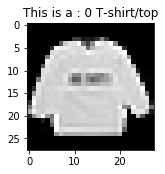

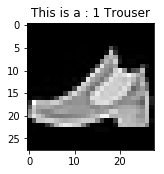

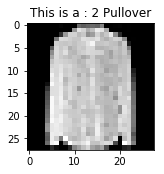

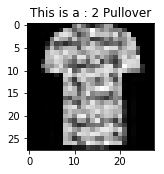

In [7]:
num_show = 4
for i in range(num_show):
    
    plt.figure(figsize=[5,5])

    plt.subplot(121)
    plt.imshow(train_X[i,:,:,0], cmap='gray')
    plt.title("This is a : {} {}".format(eval_Y[i], fashion_labels[eval_Y[i]]))

    plt.show()

Preprocessing the data: normalizing the data between 0 and 1, and also one-hot coding the class values.

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

Now let's split the training data into learning and validation parts.

In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y, test_size=0.2, random_state=131)

# 3. Defining and training the model

Here we import all of the good stuff that we'll later use for our model.

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Initializing the values we're using later for the model.

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

We define the architecture of the model we'll use for prediction 

In [12]:
model = Sequential()

chanDim = -1

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation='linear',padding='same', strides=2))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (5, 5), activation='linear',padding='same', strides=2))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(BatchNormalization())          
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [13]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)         

Here we train the model until we get good accuracy (maximize validation accuracy)

In [14]:
train_Y = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 103s 2ms/step - loss: 0.5489 - accuracy: 0.8100 - val_loss: 0.3592 - val_accuracy: 0.8702
Epoch 2/20
48000/48000 [==============================] - 102s 2ms/step - loss: 0.3608 - accuracy: 0.8707 - val_loss: 0.2897 - val_accuracy: 0.8936
Epoch 3/20
48000/48000 [==============================] - 103s 2ms/step - loss: 0.3174 - accuracy: 0.8848 - val_loss: 0.2605 - val_accuracy: 0.9038
Epoch 4/20
48000/48000 [==============================] - 102s 2ms/step - loss: 0.2934 - accuracy: 0.8954 - val_loss: 0.2846 - val_accuracy: 0.8970
Epoch 5/20
48000/48000 [==============================] - 102s 2ms/step - loss: 0.2753 - accuracy: 0.9000 - val_loss: 0.2770 - val_accuracy: 0.8963
Epoch 6/20
48000/48000 [==============================] - 103s 2ms/step - loss: 0.2608 - accuracy: 0.9048 - val_loss: 0.2304 - val_accuracy: 0.9168
Epoch 7/20
48000/48000 [==============================] - 103s

In [15]:
test_eval = model.evaluate(test_X, test_Y, verbose=0)

In [16]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2120945927619934
Test accuracy: 0.9314000010490417


In [17]:
model.save("fashion_model_3.h5py")

In the following cell we'll be evaluating our model while checking the training and validation loss and accuracy, a helpful graph will let us visualize the evolution of these parameters through each iteration (epoch).

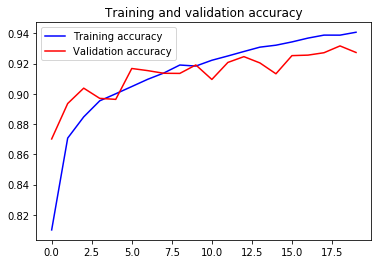

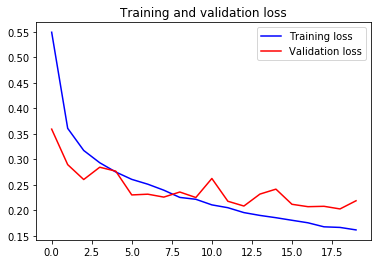

In [18]:
accuracy = train_Y.history['accuracy']
val_accuracy = train_Y.history['val_accuracy']
loss = train_Y.history['loss']
val_loss = train_Y.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In the following cell we'll be evaluating our model using the keras "evaluate()" method on the test data to see how good is the prediction.

In [19]:
test_eval = model.evaluate(test_X, test_Y, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 5s 521us/step
Test loss: 0.2120945927619934
Test accuracy: 0.9314000010490417


In this cell we'll be running the model on our test data and predicting the results.

# 4. Performing predictions and visualizing results

In [20]:
predict_Y = model.predict(test_X)
predict_Y = np.argmax(np.round(predict_Y),axis=1)

The following code will show how many correct and incorrect prediction we have made.

In [21]:
correct = np.where(predict_Y==eval_Y)[0]
incorrect = np.where(predict_Y!=eval_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
print ("Found %d correct labels" % len(correct))

Found 704 incorrect labels
Found 9296 correct labels


Here we'll be seeing some examples of our test dataset and how correctly (or incorrectly) our model has predicted them.

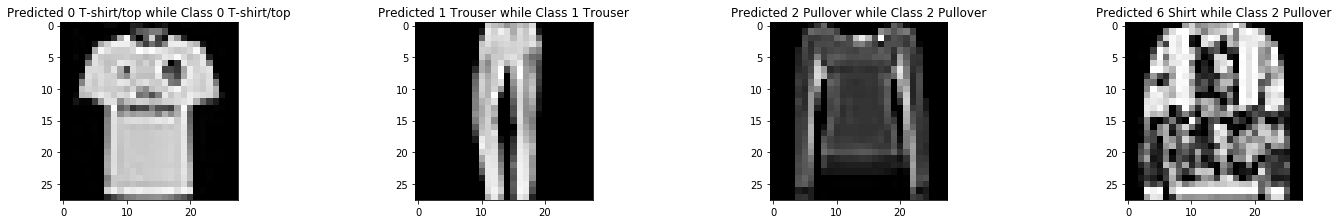

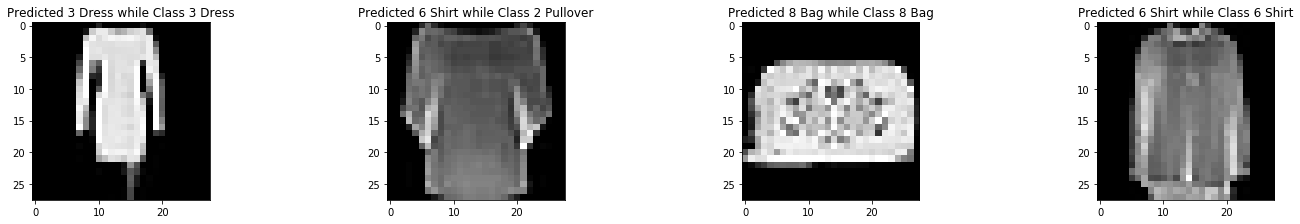

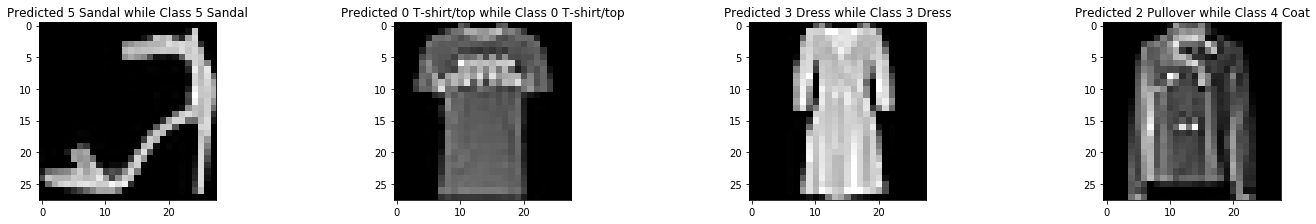

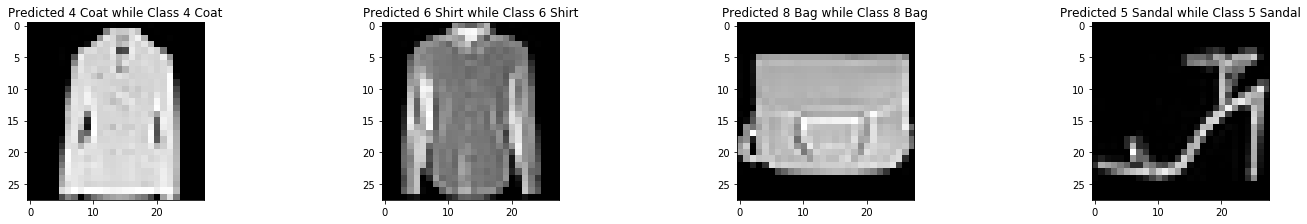

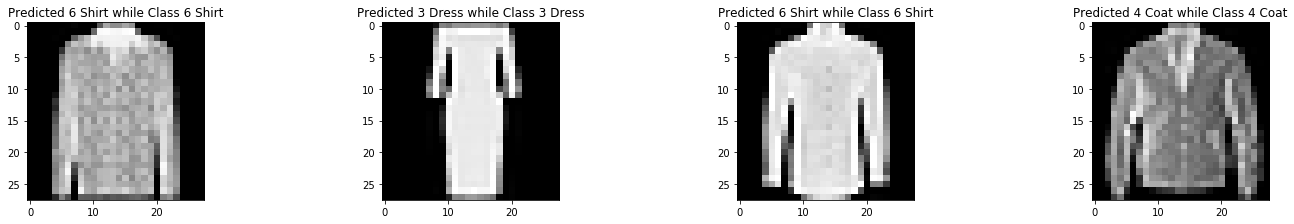

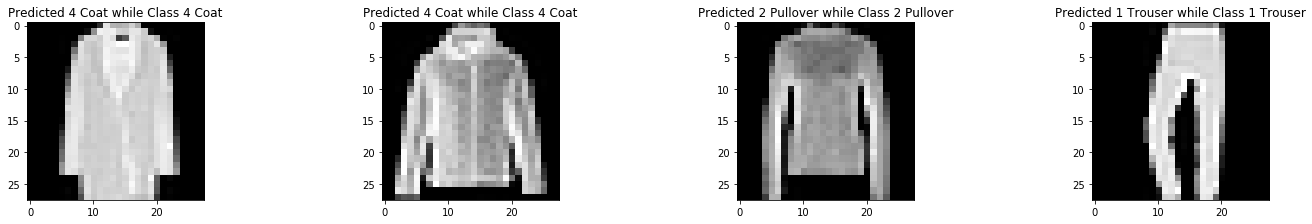

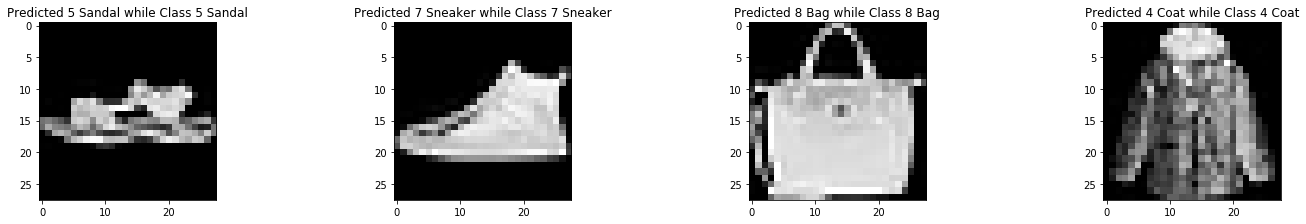

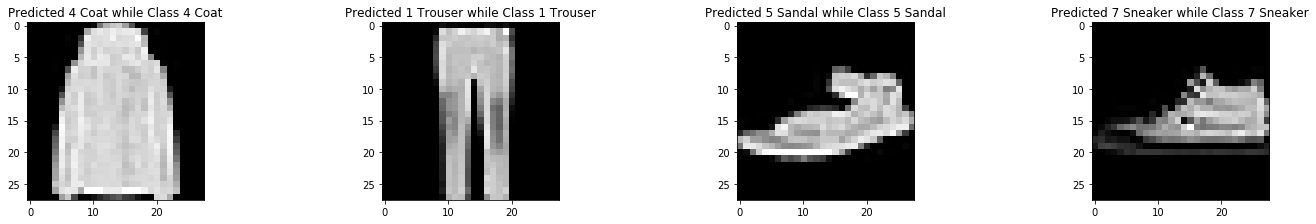

In [22]:
num_show = 32 #how many prediction to show
line = 4 #how many per line

#for i, correct in enumerate(correct[:9]):
for i in range(num_show):
    if not(i%line) and i!=0: 
        plt.figure()
    plt.subplots_adjust(left=None, bottom=None, right=3, top=None, wspace=1, hspace=None)
    plt.subplot(1,line,i%line+1)
    plt.imshow(test_X[i].reshape(28,28), cmap='gray', interpolati!jupyter nbconvert --to script config_template.ipynbon='none')
    #plt.title("Predicted {} Class {}".format(predict_Y[i], eval_Y[i]))
    plt.title("Predicted {} {} while Class {} {}".format(predict_Y[i], fashion_labels[predict_Y[i].astype(int)], eval_Y[i], fashion_labels[eval_Y[i].astype(int)]))
    #plt.tight_layout()